In [1]:
import os
import sys
import math
path_base = os.getcwd()+"/.."
if path_base not in sys.path:
    sys.path.append(path_base)

import numpy as np
import matplotlib
import matplotlib.animation
import matplotlib.patches
import matplotlib.pyplot as plt


import shapely
import mfjet 

In [2]:
calculator = mfjet.MFEuclideanCalculator()

In [3]:
coords = np.array([
    [-1,-1],
    [-1,1],
    [1,-1],
])
arr_r = np.linspace(0,5,101)

In [4]:
arr_mfs = calculator.calc_mfs(coords, arr_r)
print(arr_mfs.shape)

(101, 3)


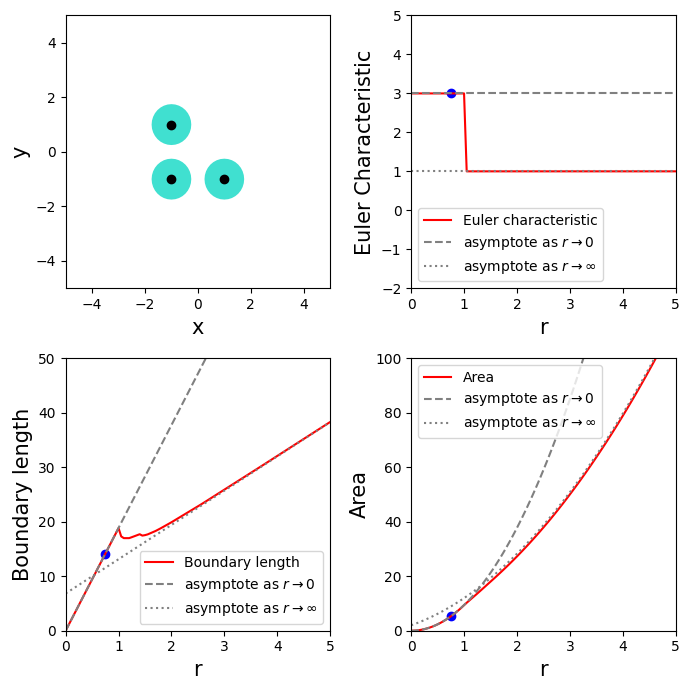

In [5]:
fig = plt.figure(figsize=[7,7]);

# dilation figure
#####################################
plt.subplot(2,2,1)
plt.plot(
    coords[:,0],
    coords[:,1],
    "o",
    c="black"
)

list_circles = [
    matplotlib.patches.CirclePolygon(
        coord, 
        radius=0.5, 
        resolution=8*4, 
        fill=True, 
        lw=None, 
        fc="turquoise"
    )
    for coord in coords
]
for circle in list_circles:
    plt.gca().add_patch(circle)


line1, = plt.plot(
    [], [],
    "--",
    color="black",
    lw=0.5
)
line2, = plt.plot(
    [], [],
    "--",
    color="black",
    lw=0.5
)
line3, = plt.plot(
    [], [],
    "--",
    color="black",
    lw=0.5
)
poly1 = matplotlib.patches.Polygon(
    np.zeros(shape=(0,2)), 
    fill=True, 
    lw=None,
    fc="gray"
)
plt.gca().add_patch(poly1)

plt.gca().set_xlabel("x",fontsize=15)
plt.gca().set_ylabel("y",fontsize=15)
plt.gca().set_xlim([-5,5])
plt.gca().set_ylim([-5,5])

# MF0 = Euler characteristic
#####################################
plt.subplot(2,2,2)
marker_euler, = plt.plot(
    [], [],
    "o",
    c="Blue"
)
plt.plot(
    arr_r,
    arr_mfs[:,0],
    c="red",
    label=r"Euler characteristic"
)
plt.plot(
    arr_r,
    3 * np.ones_like(arr_r),
    "--",
    c="gray",
    label=r"asymptote as $r \rightarrow 0$"
)
plt.plot(
    arr_r,
    1 * np.ones_like(arr_r),
    ":",
    c="gray",
    label=r"asymptote as $r \rightarrow \infty$"
)
plt.legend()
plt.gca().set_xlabel("r",fontsize=15)
plt.gca().set_ylabel("Euler Characteristic",fontsize=15)
plt.gca().set_xlim([0,5])
plt.gca().set_ylim([-2,5])

# MF1 = Boundary length
#####################################
plt.subplot(2,2,3)
marker_length, = plt.plot(
    [], [],
    "o",
    c="Blue"
)
plt.plot(
    arr_r,
    arr_mfs[:,1],
    c="red",
    label=r"Boundary length"
)
plt.plot(
    arr_r,
    3 * 2 * np.pi * arr_r,
    "--",
    c="gray",
    label=r"asymptote as $r \rightarrow 0$"
)
plt.plot(
    arr_r,
    2 * np.pi * arr_r + (4. + 2.*np.sqrt(2)),
    ":",
    c="gray",
    label=r"asymptote as $r \rightarrow \infty$"
)
plt.legend()
plt.gca().set_xlabel("r",fontsize=15)
plt.gca().set_ylabel("Boundary length",fontsize=15)
plt.gca().set_xlim([0,5])
plt.gca().set_ylim([0,50])

# MF2 = area
#####################################
plt.subplot(2,2,4)
marker_area, = plt.plot(
    [], [],
    "o",
    c="Blue"
)
plt.plot(
    arr_r,
    arr_mfs[:,2],
    c="red",
    label=r"Area"
)
plt.plot(
    arr_r,
    3 * np.pi * arr_r**2,
    "--",
    c="gray",
    label=r"asymptote as $r \rightarrow 0$"
)
plt.plot(
    arr_r,
    np.pi * arr_r**2 + (4. + 2.*np.sqrt(2.)) * arr_r + 2.,
    ":",
    c="gray",
    label=r"asymptote as $r \rightarrow \infty$"
)
plt.legend()
plt.gca().set_xlabel("r",fontsize=15)
plt.gca().set_ylabel("Area",fontsize=15)
plt.gca().set_xlim([0,5])
plt.gca().set_ylim([0,100])

plt.tight_layout()

def animate(i):
    r = arr_r[i]
    marker_euler.set_data([r],[arr_mfs[i,0]])
    marker_length.set_data([r],[arr_mfs[i,1]])
    marker_area.set_data([r],[arr_mfs[i,2]])
    for circle in list_circles:
        circle.radius = r
        
    # phase change at r=1
    if r < 1.:
        line1.set_data([], [])
        line2.set_data([], [])
    else:
        line1.set_data([-1,-1], [-1,1])
        line2.set_data([-1,1], [-1,-1])
        
    # phase change at r=sqrt(2)
    if r < np.sqrt(2):
        line3.set_data([], [])
        poly1.set_xy(np.zeros(shape=(0,2)))
    else:
        line3.set_data([-1,1], [1,-1])
        poly1.set_xy(coords)

animate(15)
plt.show()

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=arr_r.shape[0]);

# animation

In [8]:
from IPython.display import HTML
HTML(ani.to_html5_video())